In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import glob

data_directory_path = '/content/drive/MyDrive/Data-EEG-25-users-Neuromarketing/25-users/*.txt'

label_directory_path = '/content/drive/MyDrive/Data-EEG-25-users-Neuromarketing/labels/*.lab'

# Get a list of file paths that match the specified pattern for data files
data_file_paths = glob.glob(data_directory_path)

# Initialize an empty array to store the flattened data
flattened_data = np.empty((0, 7168), dtype=float)

# Iterate over the list of data file paths and flatten each file
for data_file_path in data_file_paths:
    # Read the content of the data file into a numpy array
    data = np.loadtxt(data_file_path)

    # Flatten the array and reshape it into a single row
    flattened_row = data.flatten().reshape(1, -1)

    # Concatenate the flattened row to the result array
    flattened_data = np.concatenate((flattened_data, flattened_row), axis=0)


print("Shape of flattened data:", flattened_data.shape)


label_file_paths = glob.glob(label_directory_path)

# Initialize an empty list to store the labels
labels = []

# Define a mapping from words to numerical values
label_mapping = {"disike": 0, "like": 1}

# Iterate over the list of label file paths and convert each label to a numerical value
for label_file_path in label_file_paths:
    # Read the content of the label file
    with open(label_file_path, 'r') as label_file:
        label_word = label_file.read().strip().lower()

        # Convert the label word to a numerical value using the mapping
        label_value = label_mapping.get(label_word, None)

        if label_value is not None:
            labels.append(label_value)

# Convert the list of labels to a numpy array
labels = np.array(labels).reshape(-1, 1)

# Display the shape of the final labels
print("Shape of labels:", labels.shape)

# Concatenate flattened_data and labels horizontally
combined_data = np.hstack((flattened_data, labels))

print("Shape of combined data:", combined_data.shape)


Shape of flattened data: (1045, 7168)
Shape of labels: (1045, 1)
Shape of combined data: (1045, 7169)


Accuracy: 0.6845124282982792
Precision: 0.6701030927835051
Recall: 0.5627705627705628
F1 Score: 0.6117647058823529


Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       292
         1.0       0.67      0.56      0.61       231

    accuracy                           0.68       523
   macro avg       0.68      0.67      0.67       523
weighted avg       0.68      0.68      0.68       523



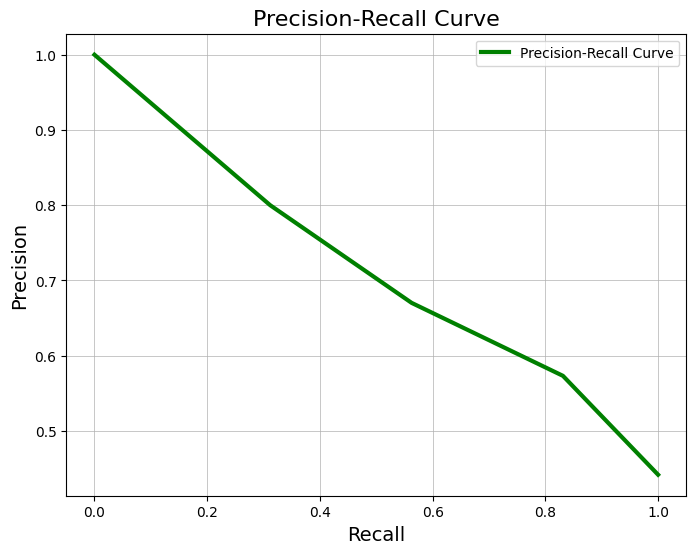

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a KNN classifier with, for example, k=3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('\n')
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a binary classifier for the precision-recall curve
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve, precision_curve, color='green', lw=3, label='Precision-Recall Curve')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve',fontdict=f_t)
plt.legend(loc='best')
plt.show()


Accuracy (scaled): 0.7361376673040153
Precision (scaled): 0.722488038277512
Recall (scaled): 0.6536796536796536
F1 Score (scaled): 0.6863636363636364
Classification Report (scaled):
               precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       292
         1.0       0.72      0.65      0.69       231

    accuracy                           0.74       523
   macro avg       0.73      0.73      0.73       523
weighted avg       0.74      0.74      0.73       523



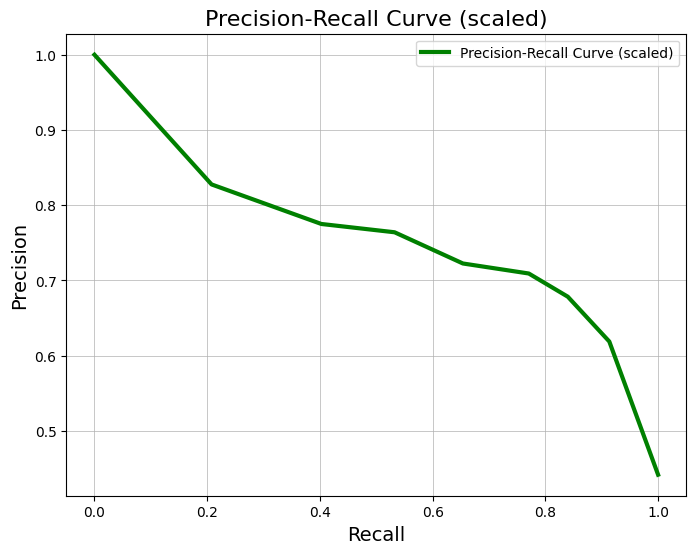

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Perform hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Create a KNN classifier with the best hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = knn_classifier.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1 score on the scaled test data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print("Accuracy (scaled):", accuracy_scaled)
print("Precision (scaled):", precision_scaled)
print("Recall (scaled):", recall_scaled)
print("F1 Score (scaled):", f1_scaled)

# Generate a classification report
class_report_scaled = classification_report(y_test, y_pred_scaled)
print("Classification Report (scaled):\n", class_report_scaled)

# Create a binary classifier for the precision-recall curve
y_pred_proba_scaled = knn_classifier.predict_proba(X_test_scaled)[:, 1]
precision_curve_scaled, recall_curve_scaled, _ = precision_recall_curve(y_test, y_pred_proba_scaled)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve_scaled, precision_curve_scaled, color='green', lw=3, label='Precision-Recall Curve (scaled)')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve (scaled)',fontdict=f_t)
plt.legend(loc='best')
plt.show()



Accuracy: 0.7272727272727273
Precision: 0.7317073170731707
Recall: 0.631578947368421
F1 Score: 0.6779661016949152


Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       114
         1.0       0.73      0.63      0.68        95

    accuracy                           0.73       209
   macro avg       0.73      0.72      0.72       209
weighted avg       0.73      0.73      0.72       209



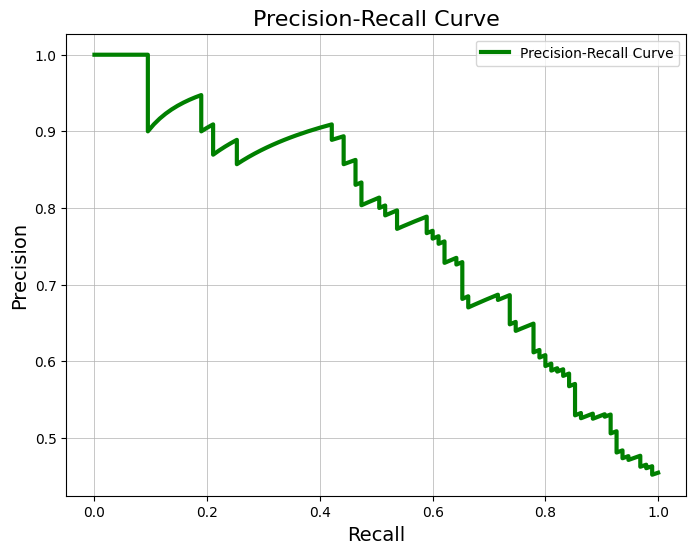

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Compute precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, svm_classifier.decision_function(X_test))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve, precision_curve, color='green', lw=3, label='Precision-Recall Curve')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve',fontdict=f_t)
plt.legend(loc='best')
plt.show()


Accuracy (scaled): 0.8421052631578947
Precision (scaled): 0.803921568627451
Recall (scaled): 0.8631578947368421
F1 Score (scaled): 0.83248730964467
Classification Report (scaled):
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       114
         1.0       0.80      0.86      0.83        95

    accuracy                           0.84       209
   macro avg       0.84      0.84      0.84       209
weighted avg       0.84      0.84      0.84       209



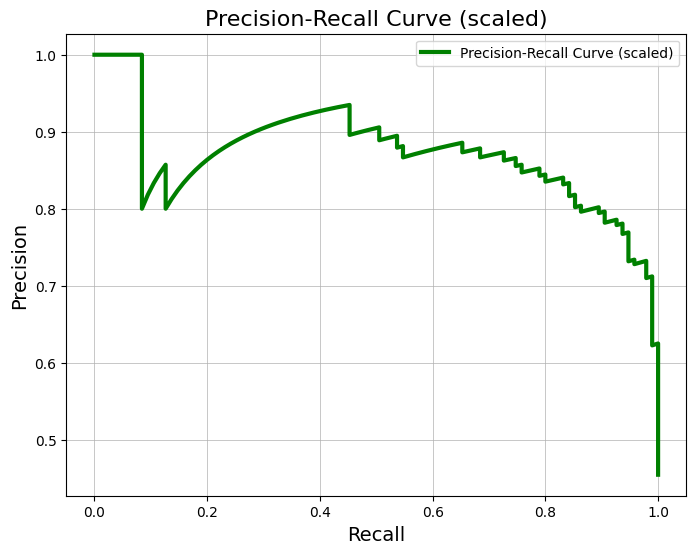

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

# Create an SVM classifier with the best hyperparameters
svm_classifier = SVC(C=best_C, kernel=best_kernel)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = svm_classifier.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1 score on the scaled test data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print("Accuracy (scaled):", accuracy_scaled)
print("Precision (scaled):", precision_scaled)
print("Recall (scaled):", recall_scaled)
print("F1 Score (scaled):", f1_scaled)

# Generate a classification report
class_report_scaled = classification_report(y_test, y_pred_scaled)
print("Classification Report (scaled):\n", class_report_scaled)

# Compute precision-recall curve
precision_curve_scaled, recall_curve_scaled, _ = precision_recall_curve(y_test, svm_classifier.decision_function(X_test_scaled))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve_scaled, precision_curve_scaled, color='green', lw=3, label='Precision-Recall Curve (scaled)')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve (scaled)',fontdict=f_t)
plt.legend(loc='best')
plt.show()


Accuracy: 0.84688995215311
Precision: 0.8
Recall: 0.8842105263157894
F1 Score: 0.8400000000000001
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       114
         1.0       0.80      0.88      0.84        95

    accuracy                           0.85       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.85      0.85      0.85       209



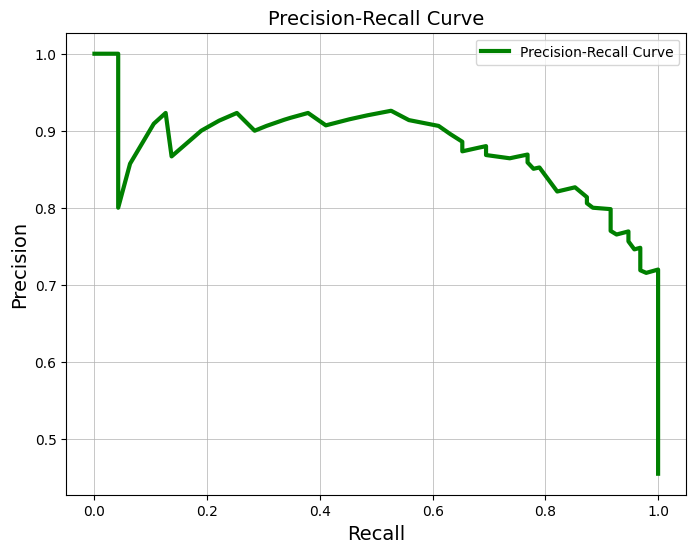

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])


# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve, precision_curve, color='green', lw=3, label='Precision-Recall Curve')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve',fontdict=f)
plt.legend(loc='best')
plt.show()


Accuracy: 0.8325358851674641
Precision: 0.7941176470588235
Recall: 0.8526315789473684
F1 Score: 0.8223350253807108
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       114
         1.0       0.79      0.85      0.82        95

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.84      0.83      0.83       209



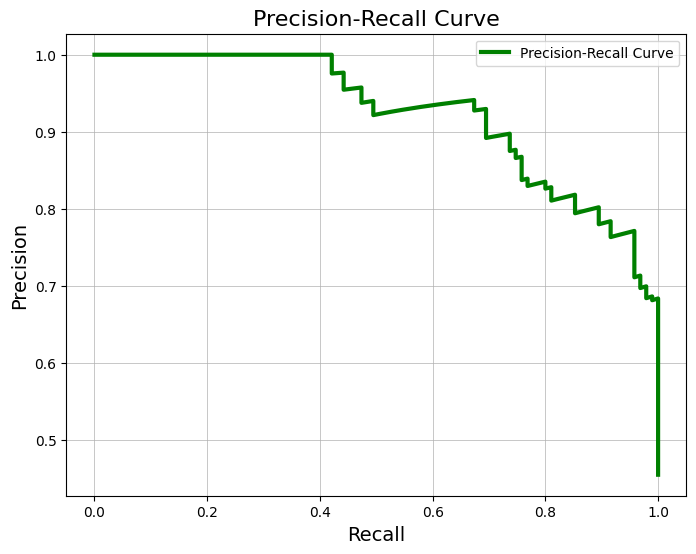

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve, precision_curve, color='green', lw=3, label='Precision-Recall Curve')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve',fontdict=f_t)
plt.legend(loc='best')
plt.show()


Epoch 1/20
27/27 [==============================] - 1s 21ms/step - loss: 1.1568 - accuracy: 0.6878 - val_loss: 0.5245 - val_accuracy: 0.7656
Epoch 2/20
27/27 [==============================] - 0s 14ms/step - loss: 1.2541 - accuracy: 0.7536 - val_loss: 0.7281 - val_accuracy: 0.7847
Epoch 3/20
27/27 [==============================] - 0s 15ms/step - loss: 0.8810 - accuracy: 0.7871 - val_loss: 1.3659 - val_accuracy: 0.6794
Epoch 4/20
27/27 [==============================] - 0s 13ms/step - loss: 0.8649 - accuracy: 0.8002 - val_loss: 0.9638 - val_accuracy: 0.7225
Epoch 5/20
27/27 [==============================] - 0s 13ms/step - loss: 0.7683 - accuracy: 0.7907 - val_loss: 0.6763 - val_accuracy: 0.7847
Epoch 6/20
27/27 [==============================] - 0s 13ms/step - loss: 0.7049 - accuracy: 0.8254 - val_loss: 1.4385 - val_accuracy: 0.7416
Epoch 7/20
27/27 [==============================] - 0s 15ms/step - loss: 0.6703 - accuracy: 0.8098 - val_loss: 0.7487 - val_accuracy: 0.8038
Epoch 8/20
27

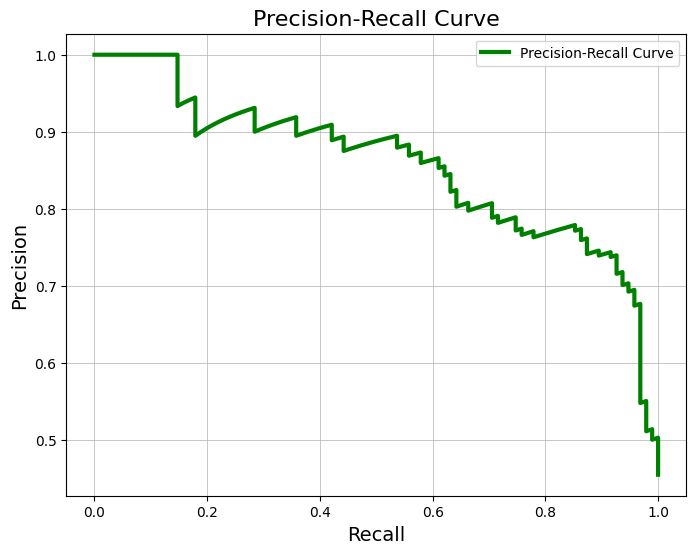

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Assuming combined_data is your feature matrix (X) and labels is your target variable (y)
# You can replace these with your actual data
X = combined_data[:, :-1]  # Features (flattened data)
y = combined_data[:, -1]   # Labels

# Preprocess data (example: normalize features)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Compute precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)


# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


# Plot precision-recall curve
plt.figure(figsize=(8, 6))
f_t={'family':'sans-serif','color':'k','size':16 }
f={'family':'sans-serif','color':'k','size':14 }
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.plot(recall_curve, precision_curve, color='green', lw=3, label='Precision-Recall Curve')
plt.xlabel('Recall',fontdict=f)
plt.ylabel('Precision',fontdict=f)
plt.title('Precision-Recall Curve',fontdict=f_t)
plt.legend(loc='best')
plt.show()